In [5]:
import sys
import pandas as pd
sys.path.append('../shifts/weather/')

In [6]:
df_train = pd.read_csv('/Users/nikglukhov/n.glukhov/canonical-paritioned-dataset/shifts_canonical_train.csv')
df_dev_in = pd.read_csv('/Users/nikglukhov/n.glukhov/canonical-paritioned-dataset/shifts_canonical_dev_in.csv')
df_dev_out = pd.read_csv('/Users/nikglukhov/n.glukhov/canonical-paritioned-dataset/shifts_canonical_dev_out.csv')

In [ ]:
df_train

,fact_time,fact_latitude,fact_longitude,fact_temperature,fact_cwsm_class,climate,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next
0,1.543321e+09,26.968800,-99.248901,2.0,0.0,dry,127.0,-17.526443,14.613571,754.263405,...,0.000000,0.000000,0.0,0.0,0.0,0.0,-2.600006,-2.750006,0.0,0.0
1,1.538776e+09,29.374201,-100.927002,31.0,20.0,mild temperate,297.0,41.531032,26.992143,733.117168,...,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.600006,17.950006,-12.0,11.0
2,1.552115e+09,22.149599,113.592003,17.0,10.0,mild temperate,-1.0,43.916531,18.842143,761.571076,...,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.233978,21.450006,1.0,8.0
3,1.549566e+09,34.678699,-86.684799,24.0,20.0,mild temperate,193.0,40.240955,8.303571,747.524910,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.059448,16.150018,-58.0,41.0
4,1.552910e+09,46.066667,41.966667,9.0,20.0,dry,90.0,30.394660,6.451429,753.168113,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.400024,3.150018,18.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129587,1.546856e+09,31.397499,-84.894798,5.0,0.0,mild temperate,73.0,-31.950552,7.063571,762.834026,...,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.100006,5.850000,0.0,0.0
3129588,1.544098e+09,-0.633333,127.500000,26.0,20.0,tropical,36.0,-33.814418,26.817143,745.765796,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,22.350000,0.0,0.0
3129589,1.537596e+09,39.008499,-74.908302,23.0,0.0,mild temperate,8.0,-52.315936,21.522143,763.335706,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.199982,19.249994,0.0,0.0
3129590,1.539281e+09,44.520199,-109.024002,3.0,10.0,dry,1522.0,28.641009,5.183571,621.353356,...,0.017717,0.530948,0.0,0.0,0.0,0.0,1.100006,-5.549994,16.0,16.0


In [ ]:
domains_train = df_train.climate.unique()
domains_in = df_dev_in.climate.unique()
domains_out = df_dev_out.climate.unique()

In [ ]:
import catboost
def expert_model(X_train, y_train, X_dev_in, y_dev_in, ensemble_size, depth, iterations, learning_rate):
    #for seed in range(ensemble_size):
    seed = 1
        
    model = catboost.CatBoostRegressor(
        learning_rate = learning_rate,
        iterations = iterations,
        depth = depth,
        loss_function = 'RMSEWithUncertainty',
        eval_metric = 'RMSE',
        random_seed = seed)
    
    print(f'\n Model index: {seed}\n')
    
    model.fit(
        X_train,
        y_train,
        verbose = 100,
        eval_set = (X_dev_in, y_dev_in))
    return model

In [6]:
ensemble_size = 1
depth = 2
iterations = 200
learning_rate = 0.03
trained_experts = []
for climate in domains_train:
    X_train = df_train[df_train.climate == climate].iloc[:,6:].copy()
    X_dev_in = df_dev_in[df_dev_in.climate == climate].iloc[:,6:].copy()
    y_train =  df_train[df_train.climate == climate]['fact_temperature'].copy()
    y_dev_in = df_dev_in[df_dev_in.climate == climate]['fact_temperature'].copy()
    
    model = expert_model(X_train, y_train, X_dev_in, y_dev_in, ensemble_size, depth, iterations, learning_rate)
    trained_experts.model


 Model index: 1

0:	learn: 11.9027190	test: 11.8783211	best: 11.8783211 (0)	total: 132ms	remaining: 26.3s
100:	learn: 3.2650061	test: 3.2191336	best: 3.2191336 (100)	total: 6.47s	remaining: 6.34s
199:	learn: 2.7555013	test: 2.7433517	best: 2.7433517 (199)	total: 12.1s	remaining: 0us

bestTest = 2.743351671
bestIteration = 199


 Model index: 1

0:	learn: 8.5706639	test: 8.5975698	best: 8.5975698 (0)	total: 201ms	remaining: 39.9s
100:	learn: 2.6599673	test: 2.6503322	best: 2.6503322 (100)	total: 17.8s	remaining: 17.4s
199:	learn: 2.3500758	test: 2.3388815	best: 2.3388815 (199)	total: 33.2s	remaining: 0us

bestTest = 2.338881481
bestIteration = 199


 Model index: 1

0:	learn: 4.4062947	test: 4.4511382	best: 4.4511382 (0)	total: 32.5ms	remaining: 6.46s
100:	learn: 2.2249750	test: 2.1976399	best: 2.1976399 (100)	total: 3.76s	remaining: 3.69s
199:	learn: 1.9855977	test: 1.9407757	best: 1.9407757 (199)	total: 7.19s	remaining: 0us

bestTest = 1.940775701
bestIteration = 199



In [7]:
# save models
dir_path = 'trained_experts'
for climate, model in source_domains_experts.items():
    model.save_model(f'trained_experts/model_{climate}')

# Validation

In [13]:
# Create a combined evaluation dataset and keep only the features
df_dev = pd.concat([df_dev_in, df_dev_out])
X_dev = df_dev.iloc[:,6:]

In [14]:
# Get ensemble of predictions for each data point

import numpy as np

def get_predictions(features_df, model):
    '''
    Calculates predictions on df features for specified model
    
    Return: array [num_samples x 2],
        where
            num_samples = number of rows in features_df
            2 = [mean, variance]
    
    '''
    return model.predict(features_df)


def get_all_predictions(features_df, models_list):
    '''
    Return: array [ensemble_size x num_samples x 2],
        where
            ensemble_size = number of models in models_list
            num_samples = number of rows in features_df
            2 = [mean, variance]
    '''
    all_preds = []
    for model in models_list:
        preds = np.asarray(get_predictions(features_df, model))
        all_preds.append(preds)
    return np.stack(all_preds, axis=0)


all_preds = get_all_predictions(X_dev, trained_experts)

In [15]:
# Choose any uncertainty measure to calculate uncertainty scores
# This tutorial uses total variance as the uncertainty measure

from uncertainty import ensemble_uncertainties_regression

all_uncertainty = ensemble_uncertainties_regression(all_preds)
uncertainties = all_uncertainty['tvar']

### Retention Curves

In this tutorial, retention curves are generated for two different metrics:
1. Mean Squared Error (MSE)
2. F1-score

In each case, the x-axis represents the fraction of data points retained, where the data points are ordered by the chosen uncertainty measure.

In [16]:
# Get ensemble predictions
all_preds_mean = all_preds[:,:,0]
avg_preds = np.squeeze(np.mean(all_preds_mean, axis=0))

# Get target values
targets = np.asarray(df_dev['fact_temperature'])

# squared error
errors = (avg_preds - targets) ** 2

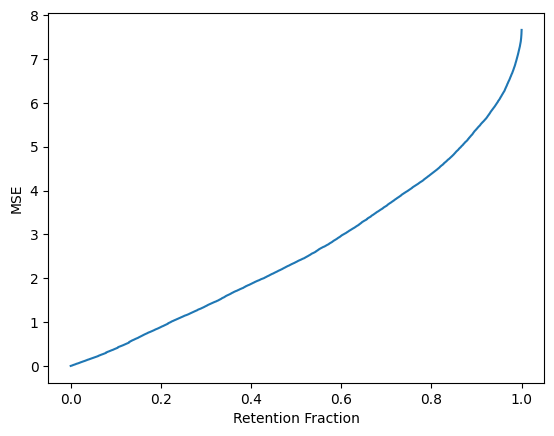

<Figure size 640x480 with 0 Axes>

In [17]:
# MSE retention curve
from assessment import calc_uncertainty_regection_curve
import matplotlib.pyplot as plt

# MSE retention values
rejection_mse = calc_uncertainty_regection_curve(errors, uncertainties)
retention_mse = rejection_mse[::-1]

retention_fractions = np.linspace(0,1,len(retention_mse))

# plot
plt.plot(retention_fractions, retention_mse)
plt.ylabel('MSE')
plt.xlabel("Retention Fraction")
plt.show()
plt.clf()

F1 score at 95% retention:  0.5400948982234585


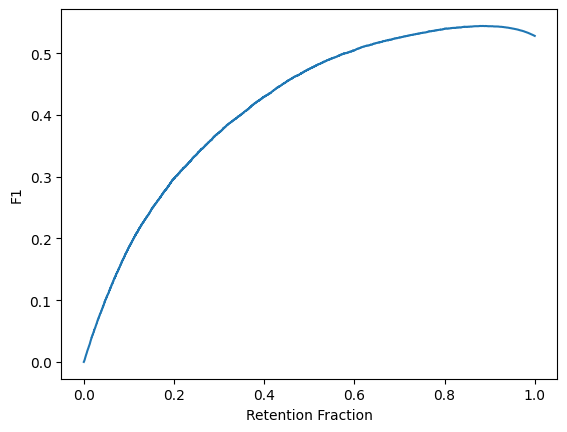

<Figure size 640x480 with 0 Axes>

In [18]:
# F1-score retention curve
from assessment import f_beta_metrics

# Use an acceptable error threshold of 1 degree
thresh = 1.0

# Get all metrics
f_auc, f95, retention_f1 = f_beta_metrics(errors, uncertainties, thresh, beta=1.0)
print("F1 score at 95% retention: ", f95)

retention_fractions = np.linspace(0,1,len(retention_f1))

# plot
plt.plot(retention_fractions, retention_f1)
plt.ylabel('F1')
plt.xlabel("Retention Fraction")
plt.show()
plt.clf()

## 7. Submission

A zipped csv file in a specific format has to be prepared for submission. It is important that the submission is for the combined dataset of `dev_in` + `dev_out` = `dev`, where order of concatenation is as stated - this is to ensure all given IDs are correct at submission time.

The submitted csv file should contain the following columns:
- ID
- PRED
- UNCERTAINTY

In [19]:
# Prepare the ids
ids = np.arange(1, len(df_dev) + 1)

# Predictions are the mean predictions across the ensemble of models
preds = np.mean(all_preds[:,:,0], axis=0)

# The uncertainties have been calculated in the previous step

# Store all the information to be submitted in a df
df_submission = pd.DataFrame(data={
        'ID' : ids,
        'PRED' : preds,
        'UNCERTAINTY' : uncertainties
        })

df_submission.head()

,ID,PRED,UNCERTAINTY
0,1,9.936188,11.049206
1,2,5.357737,21.003535
2,3,23.521970,7.747035
3,4,2.978072,21.348604
4,5,14.111982,8.318689


In [19]:
# Save as csv
out_file = 'df_submission.csv'
df_submission.to_csv(out_file, index=False)

In [ ]:
# tar the csv file
! tar -zcvf df_submission.tar.gz df_submission.csv

Finally, submit the submission file to the [website](https://research.yandex.com/shifts/weather).